<a href="https://colab.research.google.com/github/parnika11/my-first-pull-request/blob/development/Prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
@author = parnika 

from IPython.display import display
from PIL import Image

# Program for Handwritten Character Recognition using tensorflow, keras on MNIST dataset

import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Above statement imports and loads the MNIST dataset from the net
# x_train  has 60000 image samples, x_test has 10000 image samples

import matplotlib.pyplot as plt
#matplotlib inline # Only use this if using iPython

11493376/11490434 [==============================] - 0s 0us/step


8
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


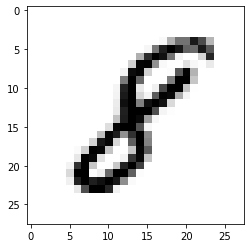

In [2]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

Using TensorFlow backend.


Epoch 1/10
60000/60000 [==============================] - 36s 597us/step - loss: 0.2023 - accuracy: 0.9396
Epoch 2/10
60000/60000 [==============================] - 35s 590us/step - loss: 0.0815 - accuracy: 0.9751
Epoch 3/10
60000/60000 [==============================] - 36s 596us/step - loss: 0.0577 - accuracy: 0.9811
Epoch 4/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.0440 - accuracy: 0.9858
Epoch 5/10
60000/60000 [==============================] - 36s 593us/step - loss: 0.0348 - accuracy: 0.9887
Epoch 6/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.0286 - accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] - 35s 585us/step - loss: 0.0246 - accuracy: 0.9911
Epoch 8/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.0193 - accuracy: 0.9931
Epoch 9/10
60000/60000 [==============================] - 35s 590us/step - loss: 0.0169 - accuracy: 0.9944
Epoch 10/10
10000/10000 [============

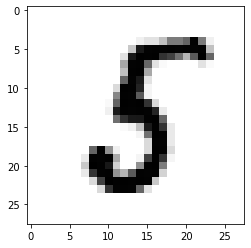

In [3]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

# Compiling and fitting the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs = 10)

#Evaluating the Model
model.evaluate(x_test, y_test)


# Making individual predivtions
image_index = 5020
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('The character is ')
print(pred.argmax())